In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [3]:
data=pd.read_csv(r"C:\Users\rosha\Desktop\assignments\PCA\wine.csv")
data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
data.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [9]:
data[data.duplicated(keep=False)]

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline


In [10]:
data.skew()

Type               0.107431
Alcohol           -0.051482
Malic              1.039651
Ash               -0.176699
Alcalinity         0.213047
Magnesium          1.098191
Phenols            0.086639
Flavanoids         0.025344
Nonflavanoids      0.450151
Proanthocyanins    0.517137
Color              0.868585
Hue                0.021091
Dilution          -0.307285
Proline            0.767822
dtype: float64

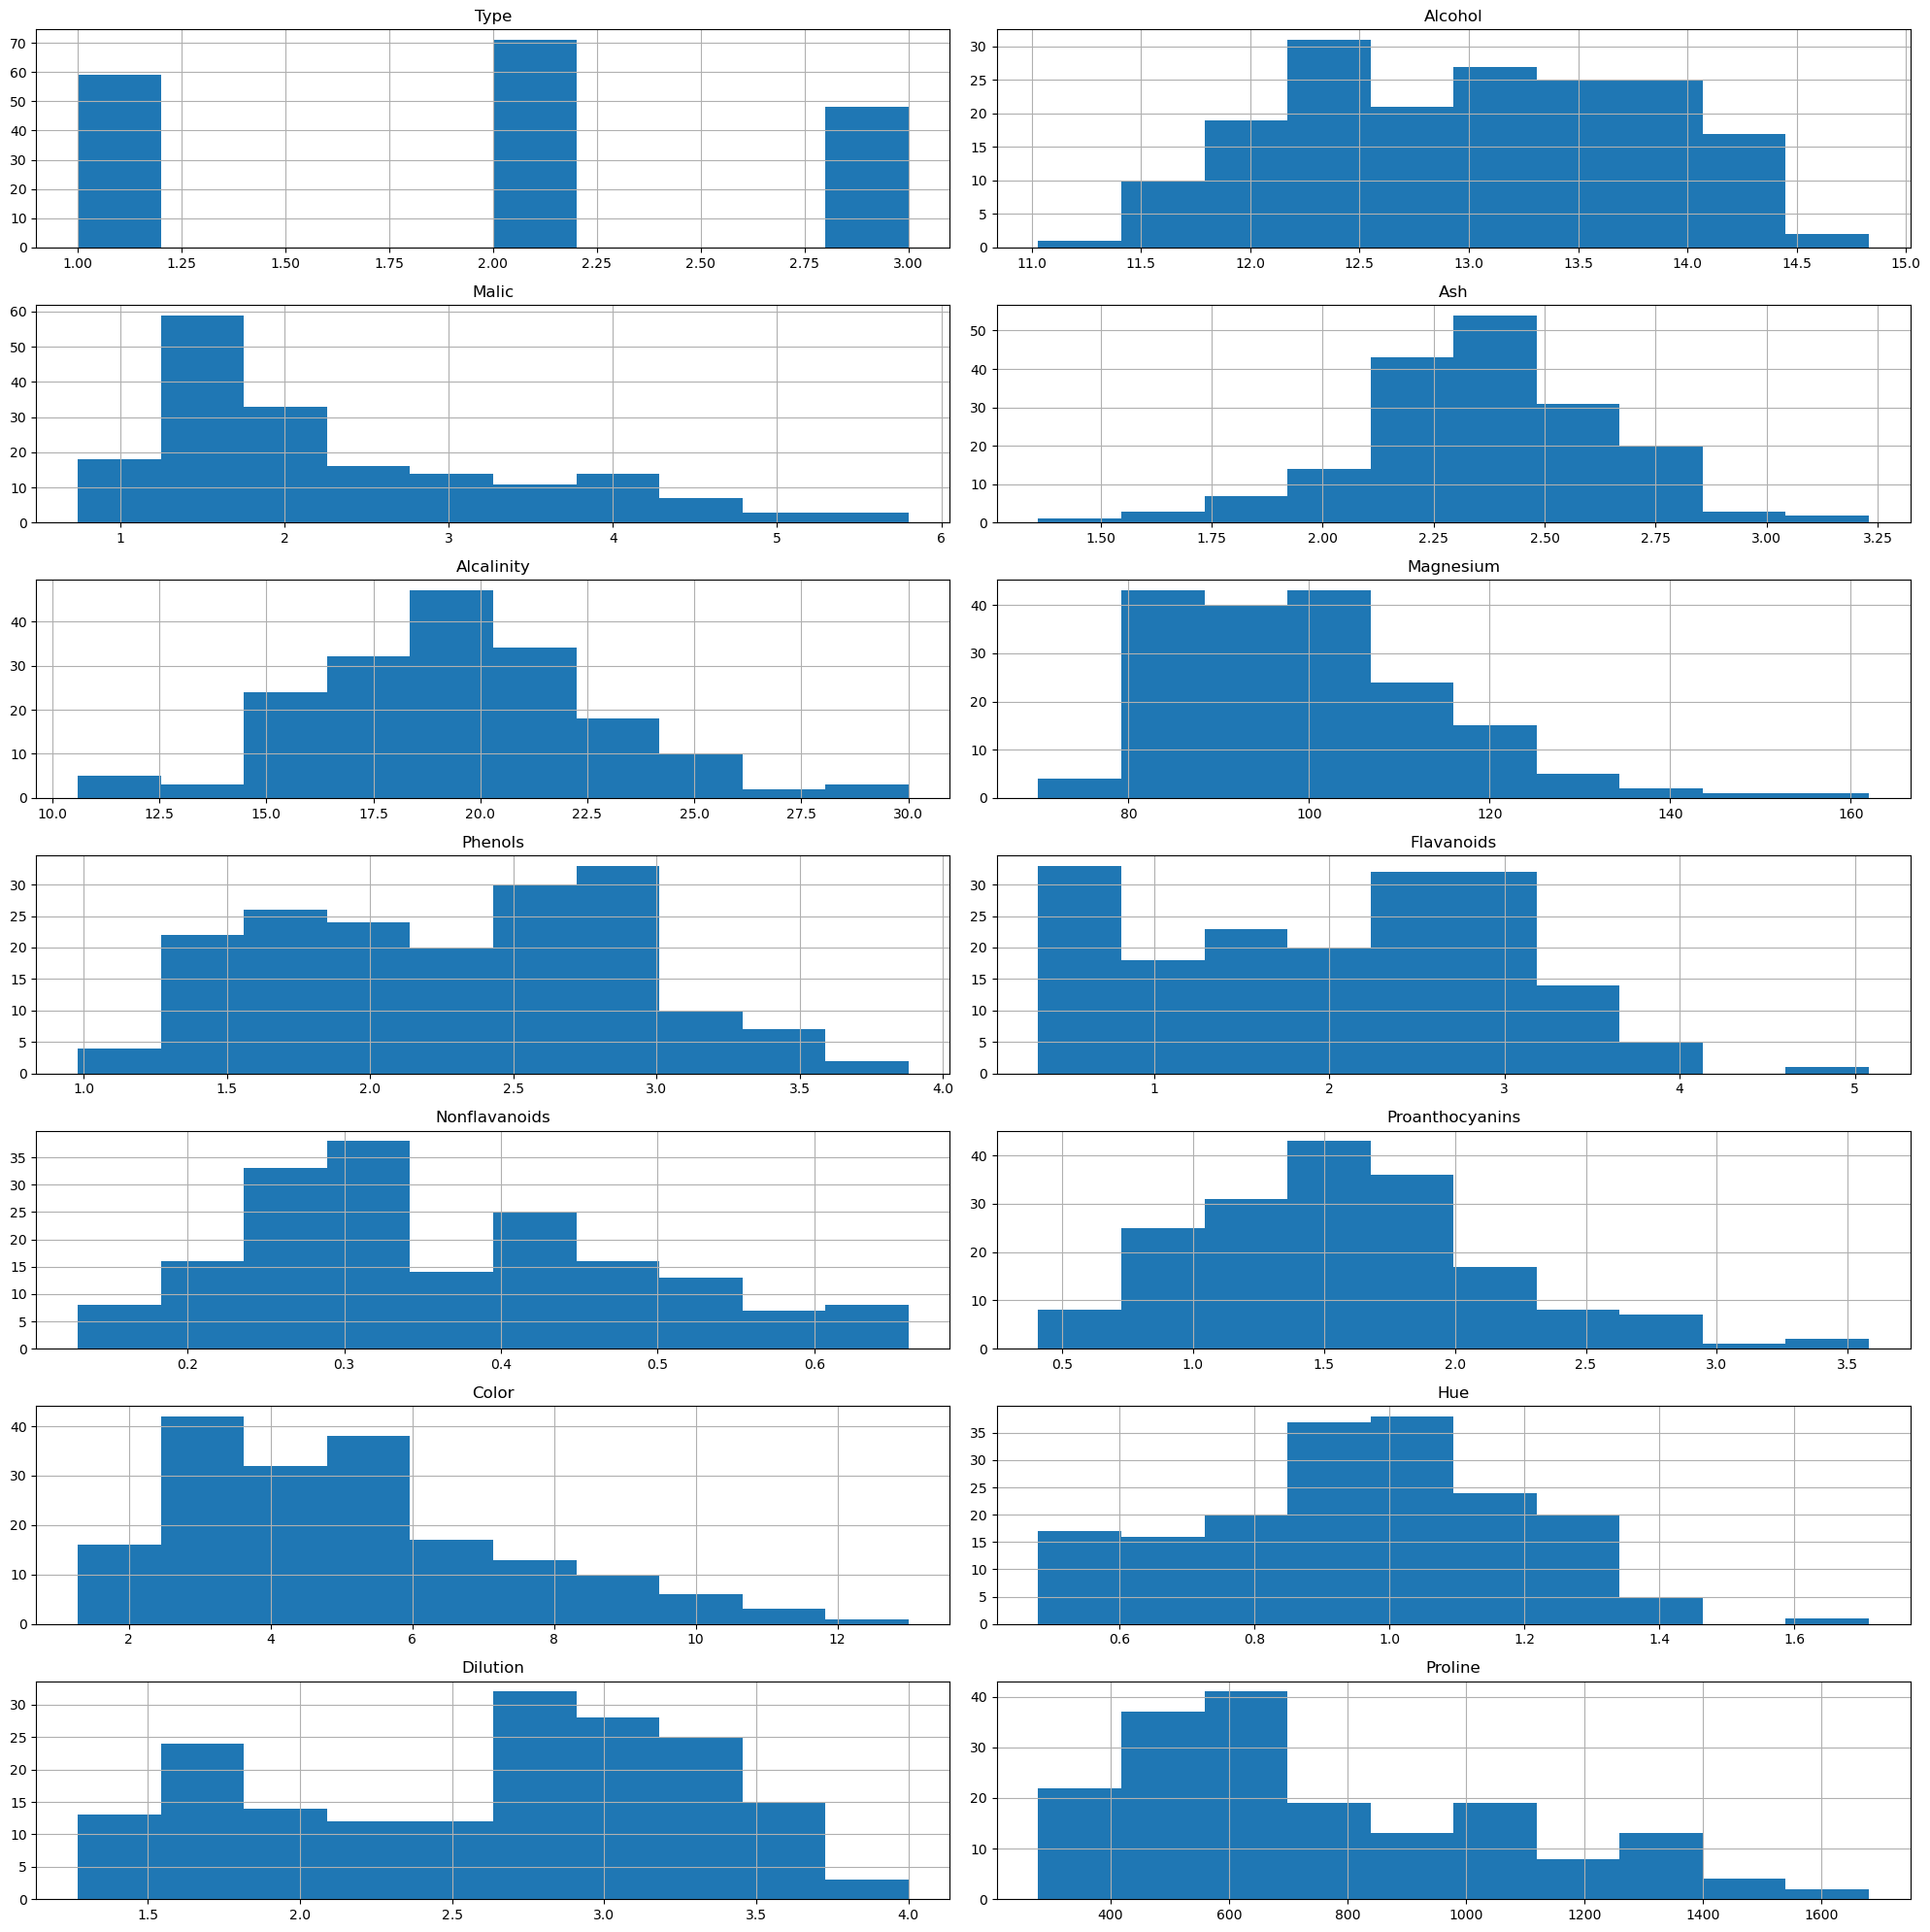

In [11]:
data.hist(layout=(7,2),figsize=(20,20))
plt.tight_layout()
plt.show()

In [12]:
data.Malic=np.log1p(data.Malic)
data.Magnesium =np.log1p(data.Magnesium )

In [13]:
data.skew()

Type               0.107431
Alcohol           -0.051482
Malic              0.529222
Ash               -0.176699
Alcalinity         0.213047
Magnesium          0.605723
Phenols            0.086639
Flavanoids         0.025344
Nonflavanoids      0.450151
Proanthocyanins    0.517137
Color              0.868585
Hue                0.021091
Dilution          -0.307285
Proline            0.767822
dtype: float64

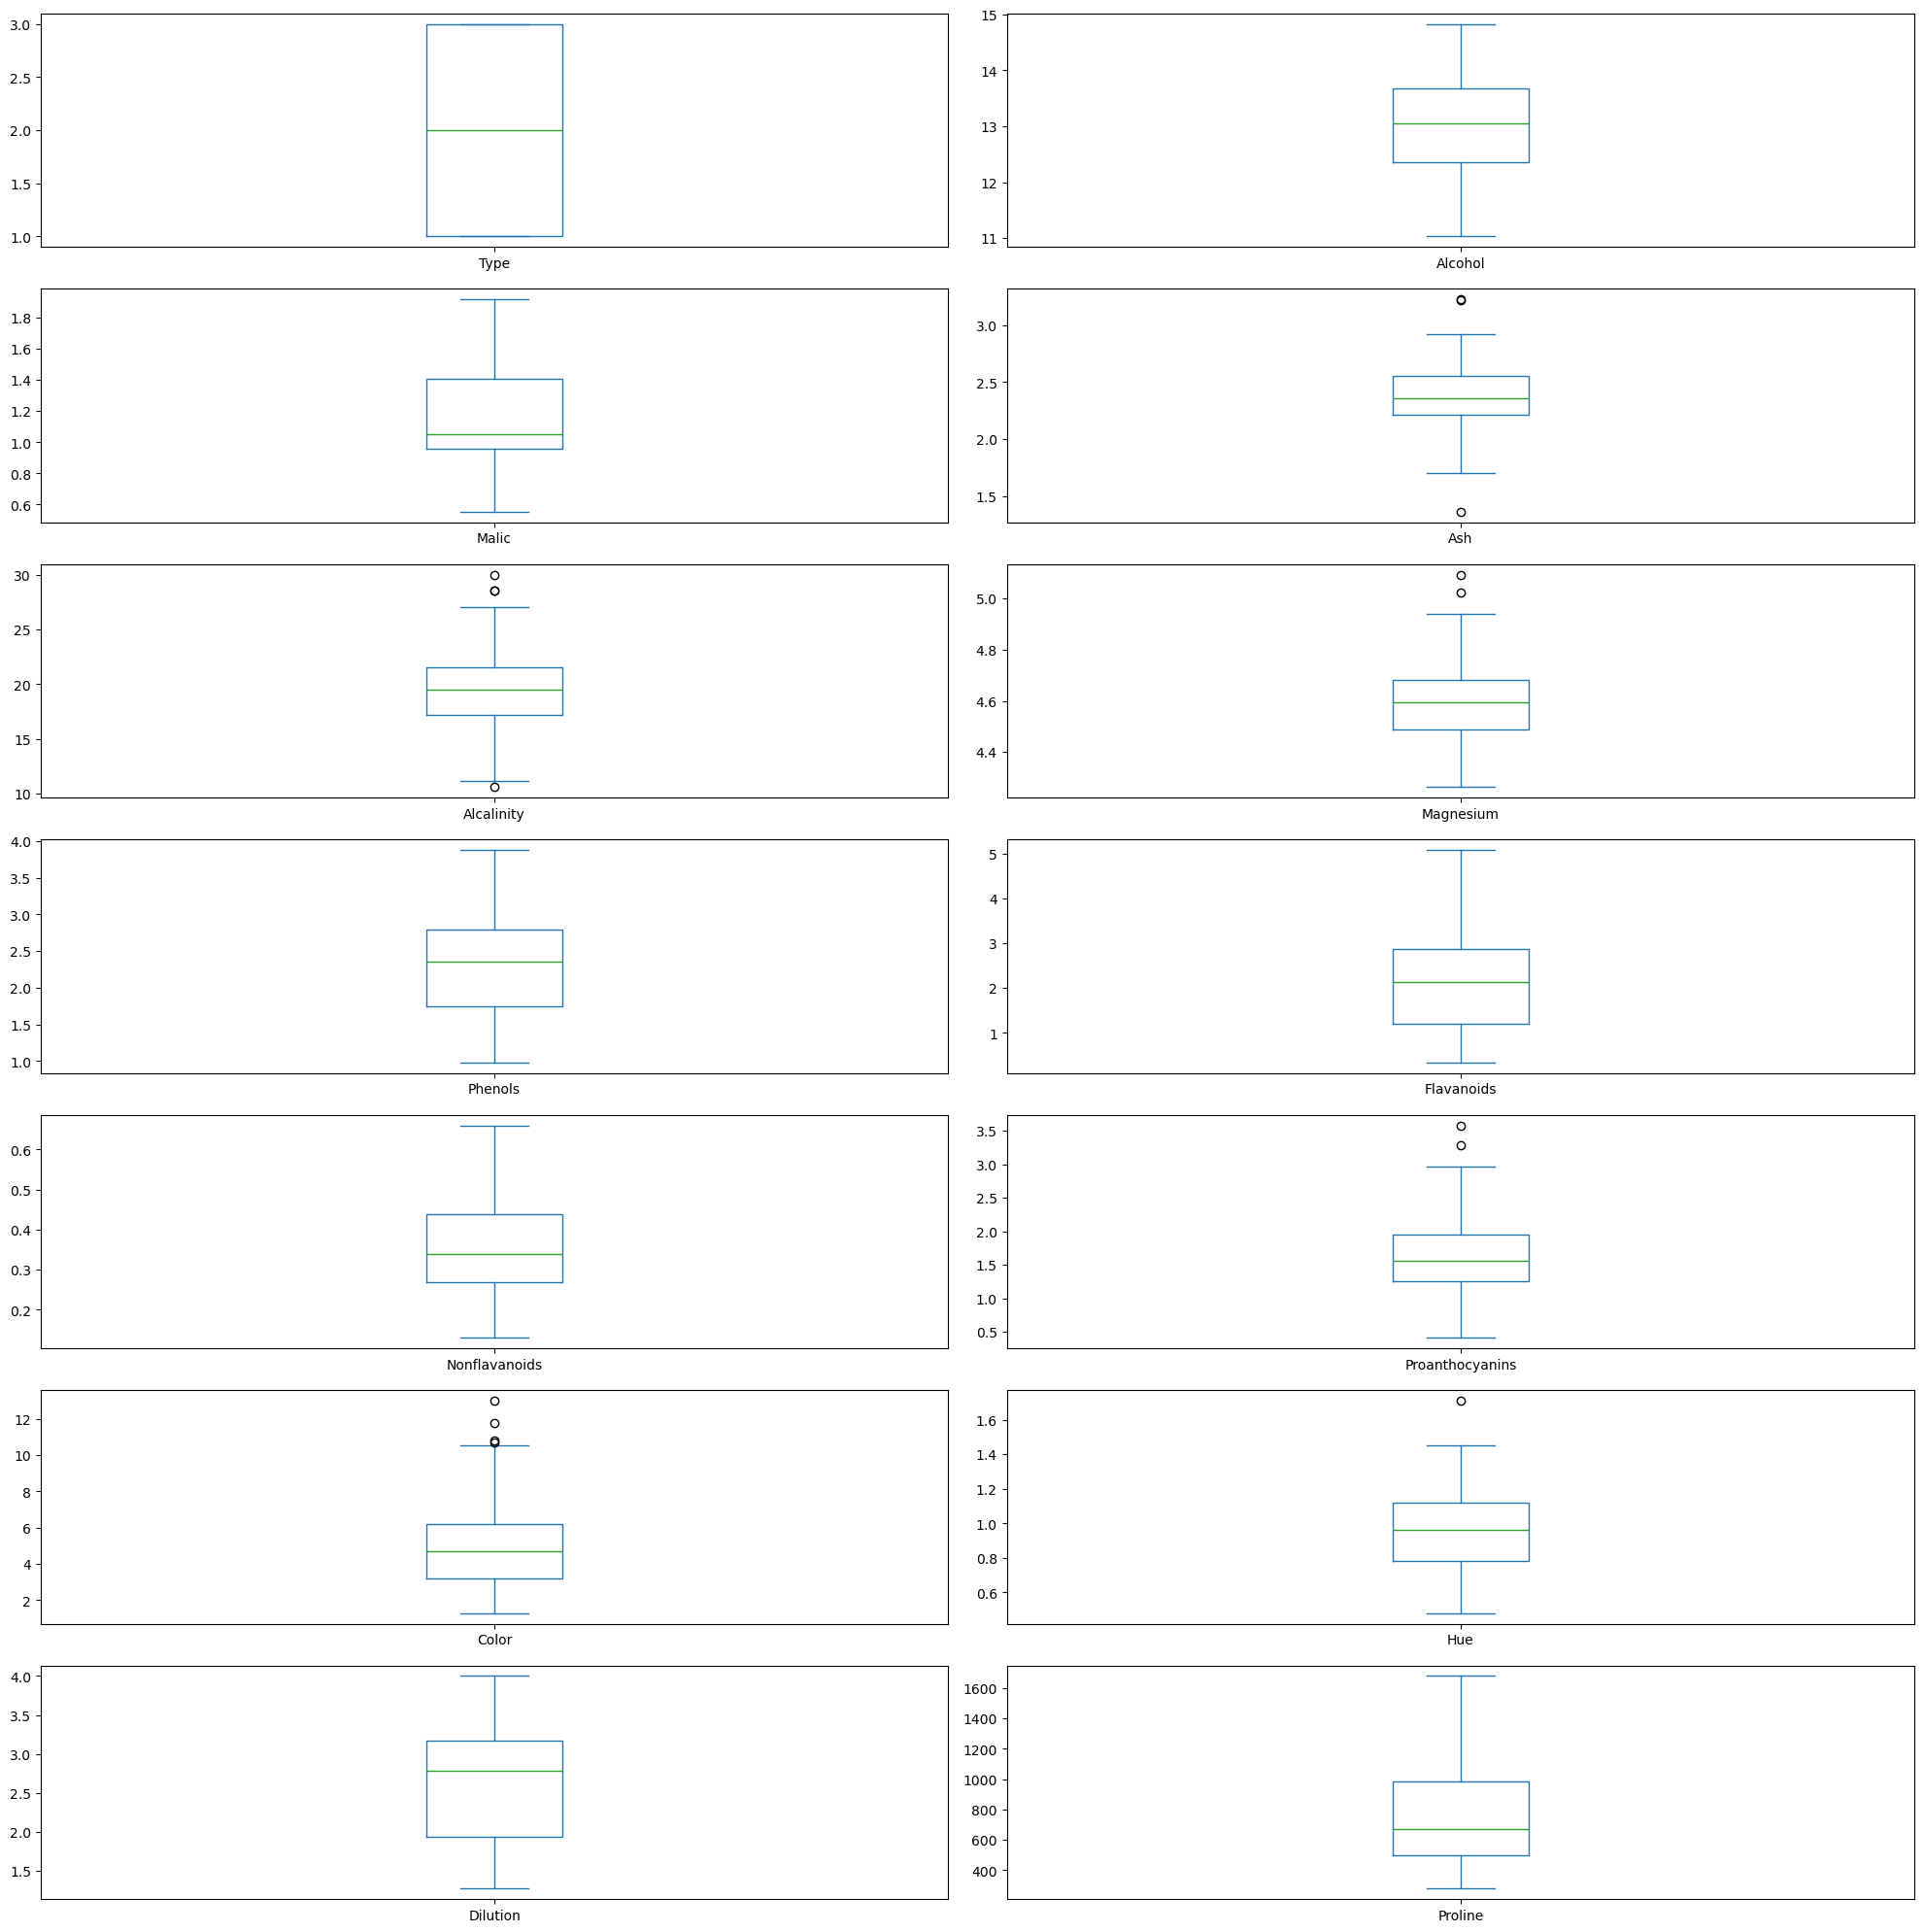

In [17]:
data.plot(kind="box",layout=(7,2),subplots=True,figsize=(20,20))
plt.tight_layout()
plt.show()

In [23]:
data.corr()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,1.000000,-0.328222,0.416223,-0.049643,0.517859,-0.218132,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.116901,0.211545,-0.310235,0.298318,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.416223,0.116901,1.000000,0.205229,0.294100,-0.009208,-0.330602,-0.392436,0.287910,-0.213087,0.276331,-0.567619,-0.351980,-0.157129
Ash,-0.049643,0.211545,0.205229,1.000000,0.443367,0.312469,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,0.517859,-0.310235,0.294100,0.443367,1.000000,-0.093037,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.218132,0.298318,-0.009208,0.312469,-0.093037,1.000000,0.225544,0.203390,-0.254293,0.220277,0.230516,0.041877,0.057683,0.416753
Phenols,-0.719163,0.289101,-0.330602,0.128980,-0.321113,0.225544,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.392436,0.115077,-0.351370,0.203390,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,0.489109,-0.155929,0.287910,0.186230,0.361922,-0.254293,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.213087,0.009652,-0.197327,0.220277,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


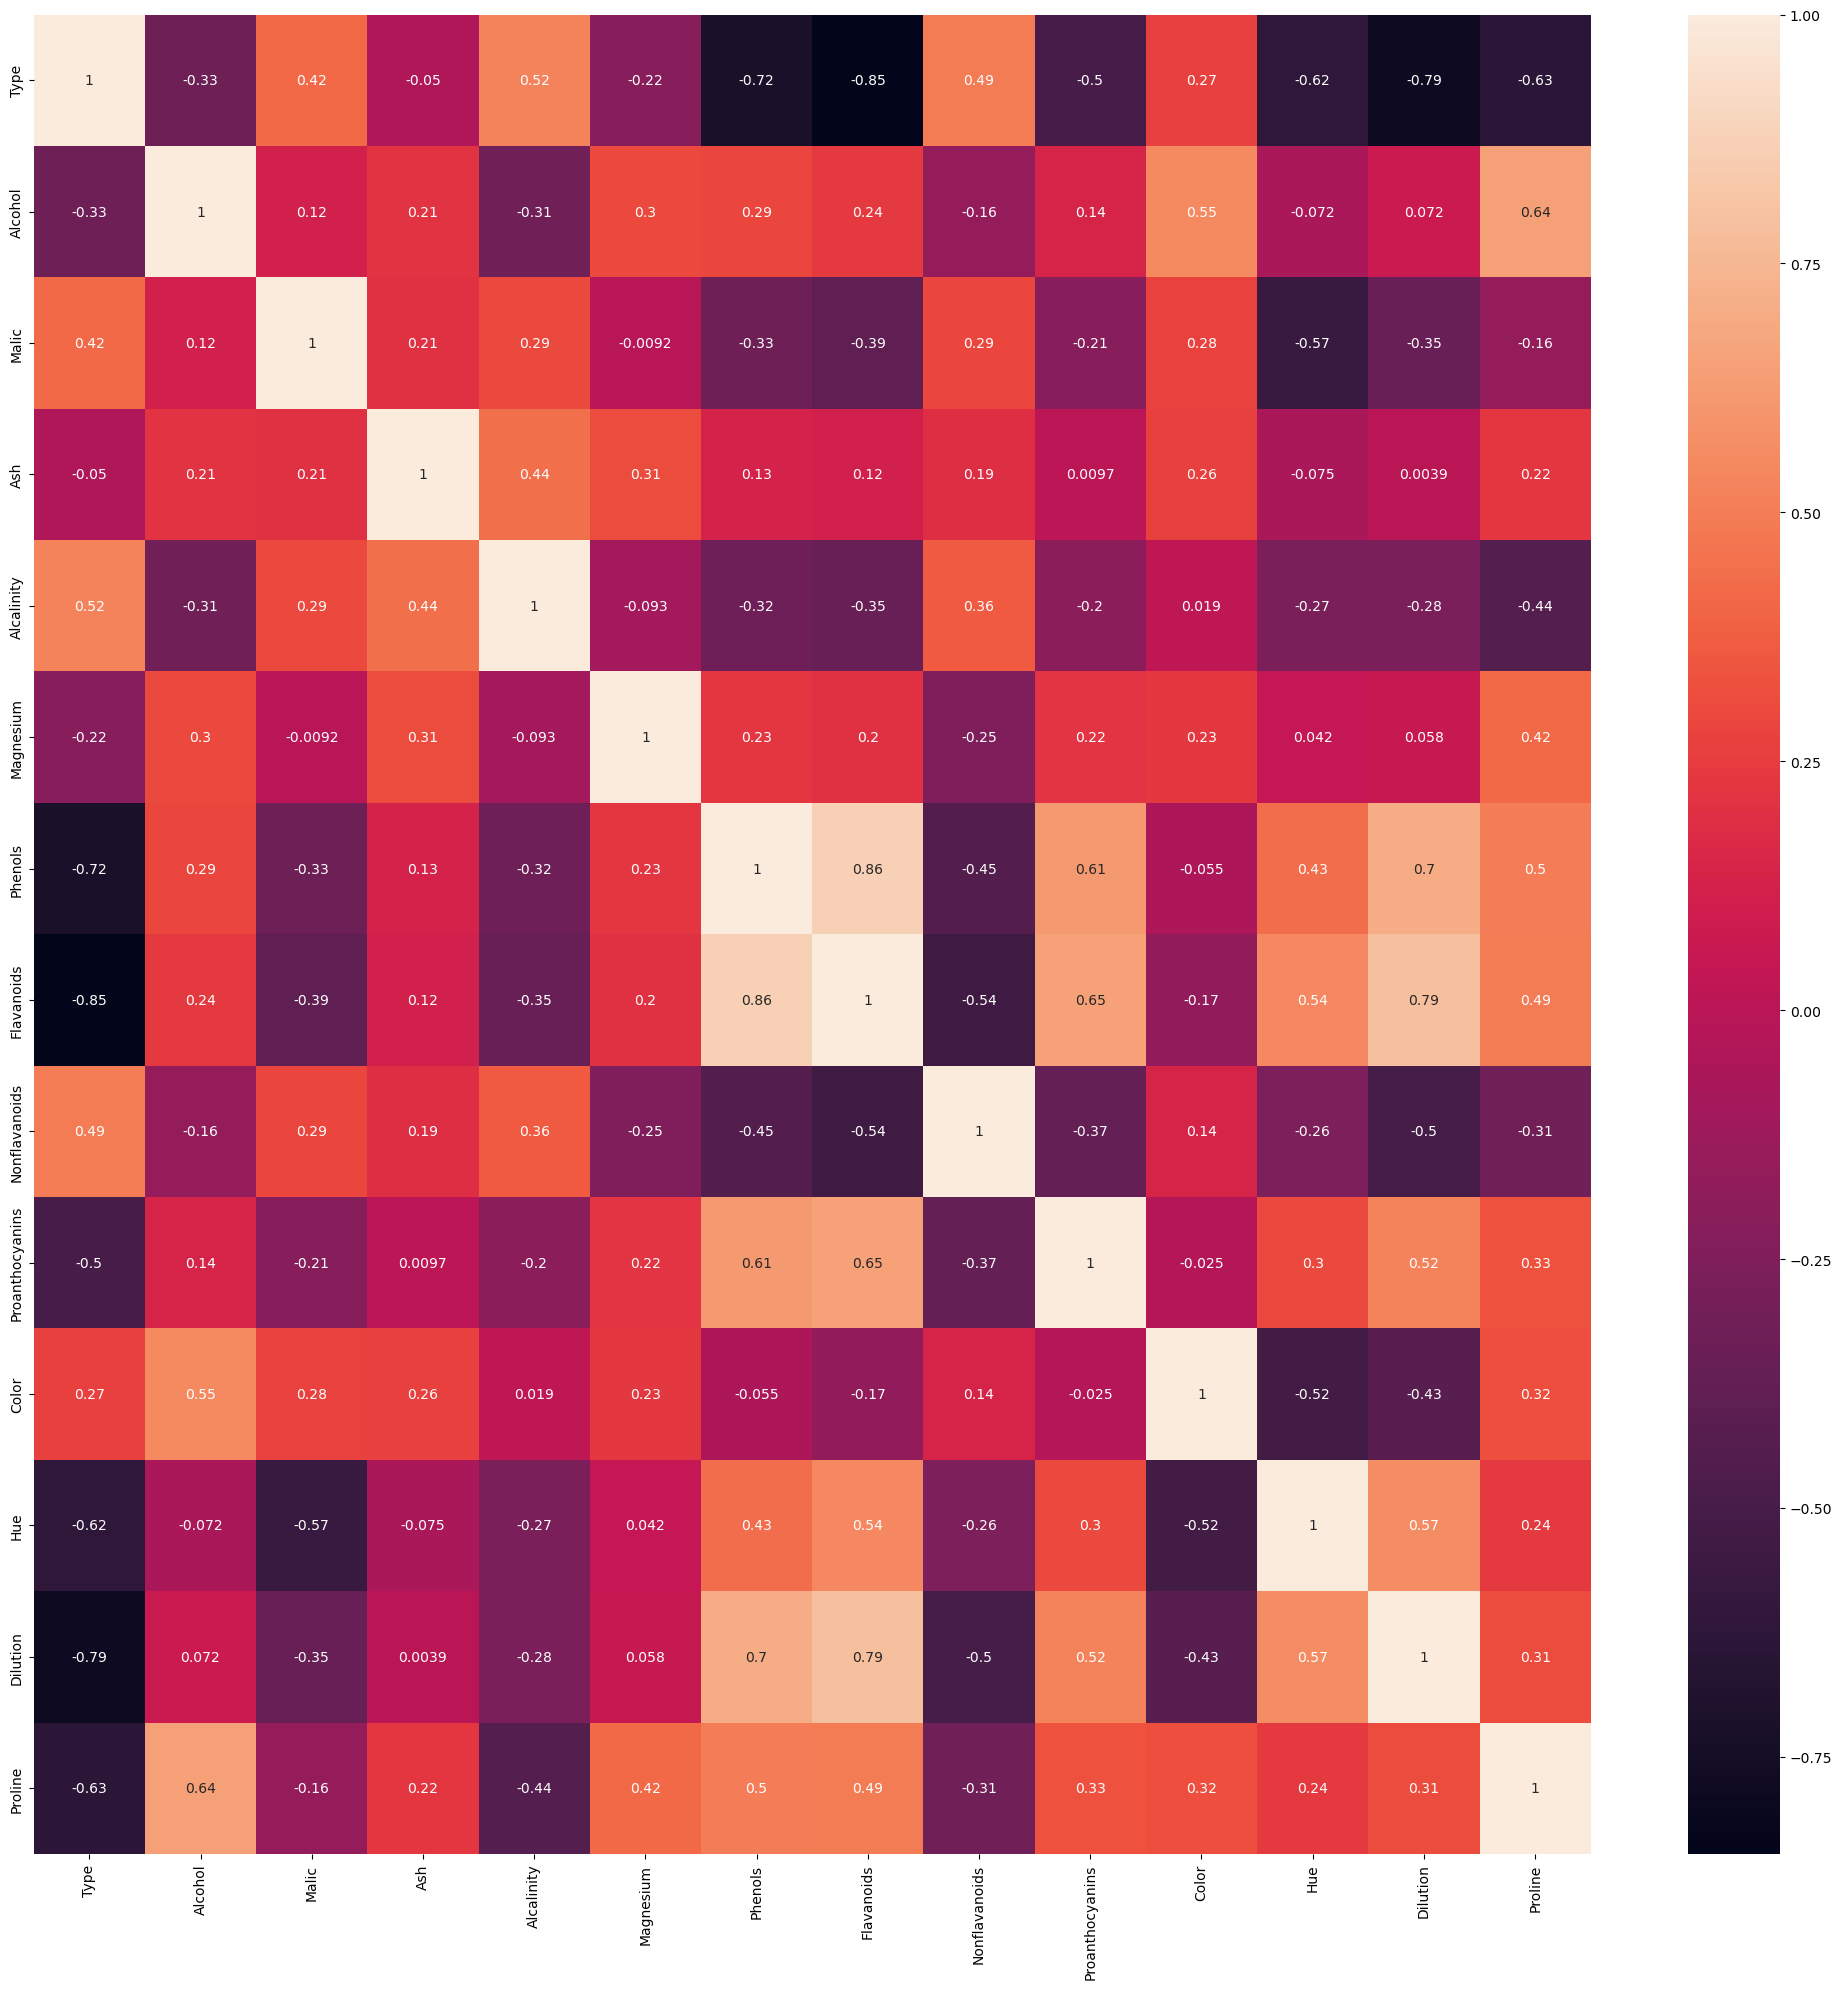

In [28]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)
plt.tight_layout()
plt.show()

In [22]:
ss=StandardScaler()
dss1=ss.fit_transform(data)
ssdata=pd.DataFrame(dss1,columns=ss.get_feature_names_out())
ssdata

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,-1.213944,1.518613,-0.511810,0.232053,-1.169593,1.844269,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,-1.213944,0.246290,-0.429201,-0.827996,-2.490847,0.088329,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,-1.213944,0.196879,0.184609,1.109334,-0.268738,0.161353,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,-1.213944,1.691550,-0.236937,0.487926,-0.809251,0.985741,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,-1.213944,0.295700,0.399085,1.840403,0.451946,1.303895,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,1.373864,0.876275,2.395982,0.305159,0.301803,-0.287988,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,1.373864,0.493343,1.413372,0.414820,1.052516,0.233664,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,1.373864,0.332758,1.648712,-0.389355,0.151661,1.427429,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,1.373864,0.209232,0.399085,0.012732,0.151661,1.427429,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [29]:
ssdata.drop("Type",axis=1,inplace=True)

In [30]:
ssdata

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1.518613,-0.511810,0.232053,-1.169593,1.844269,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.429201,-0.827996,-2.490847,0.088329,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.184609,1.109334,-0.268738,0.161353,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.236937,0.487926,-0.809251,0.985741,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.399085,1.840403,0.451946,1.303895,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.395982,0.305159,0.301803,-0.287988,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.413372,0.414820,1.052516,0.233664,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.648712,-0.389355,0.151661,1.427429,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.399085,0.012732,0.151661,1.427429,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [32]:
from sklearn.decomposition import PCA


In [104]:
pca=PCA(n_components=6)
pca_data=pca.fit_transform(ssdata)
pca_data

array([[ 3.29405352, -1.45389354, -0.1975045 , -0.12935778,  0.58873423,
        -0.19990157],
       [ 2.20692102,  0.31016715, -1.98823913, -0.28479963, -0.12135687,
        -1.02528475],
       [ 2.48998043, -1.0982628 ,  1.01033742,  0.73916349, -0.30506124,
         0.4600118 ],
       ...,
       [-2.64830201, -2.76641937, -0.99474486,  0.38040953,  1.13068993,
         0.38337552],
       [-2.43326734, -2.33556096, -0.61223629, -0.48726786,  0.71705736,
         1.14280792],
       [-3.18768788, -2.76766603,  0.97594201,  0.45643718, -0.98425544,
         0.32855023]])

In [113]:
pca_variance=pca.explained_variance_ratio_
pca_variance

array([0.36084361, 0.19689548, 0.11157532, 0.06980756, 0.06345224,
       0.04969464])

In [115]:
pca_total=np.cumsum(np.round(pca_variance,4)*100)
pca_total

array([36.08, 55.77, 66.93, 73.91, 80.26, 85.23])

In [106]:
pca_df=pd.DataFrame(pca_data,columns=["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6"])
pca_df

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6
0,3.294054,-1.453894,-0.197505,-0.129358,0.588734,-0.199902
1,2.206921,0.310167,-1.988239,-0.284800,-0.121357,-1.025285
2,2.489980,-1.098263,1.010337,0.739163,-0.305061,0.460012
3,3.740999,-2.782397,-0.192061,0.555552,-0.362940,0.088825
4,0.970236,-0.972369,2.030648,-0.386643,0.350616,-0.410531
...,...,...,...,...,...,...
173,-3.210312,-2.117360,-0.382315,0.652379,-0.655418,-0.844476
174,-2.587649,-1.793619,0.194122,0.336489,0.234063,0.014153
175,-2.648302,-2.766419,-0.994745,0.380410,1.130690,0.383376
176,-2.433267,-2.335561,-0.612236,-0.487268,0.717057,1.142808


In [51]:
from sklearn.cluster import KMeans

In [112]:
wcss1=[]
for k in range(1,10):
    kkk=KMeans(n_clusters=k).fit(pca_df)
    wcss1.append(np.round(kkk.inertia_,2))
wcss1

C:\Users\rosha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rosha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rosha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rosha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

[1972.15, 1318.85, 931.33, 840.33, 773.86, 707.71, 654.86, 655.03, 593.97]

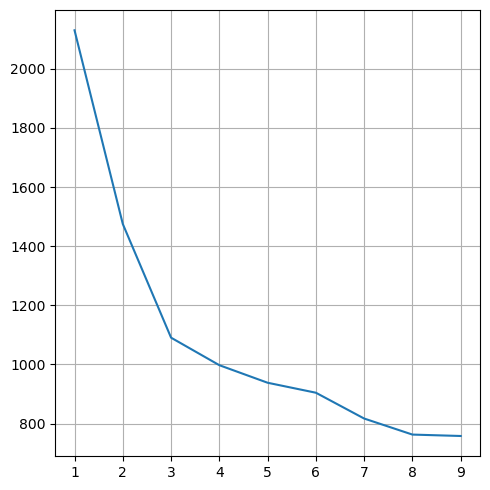

In [111]:
plt.figure(figsize=(5,5))
plt.plot(range(1,10),wcss1)
plt.tight_layout()
plt.grid()
plt.show()

In [107]:
kk=KMeans(n_clusters=3)
kkdata=kk.fit_predict(pca_df)


C:\Users\rosha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [108]:
kkdata

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

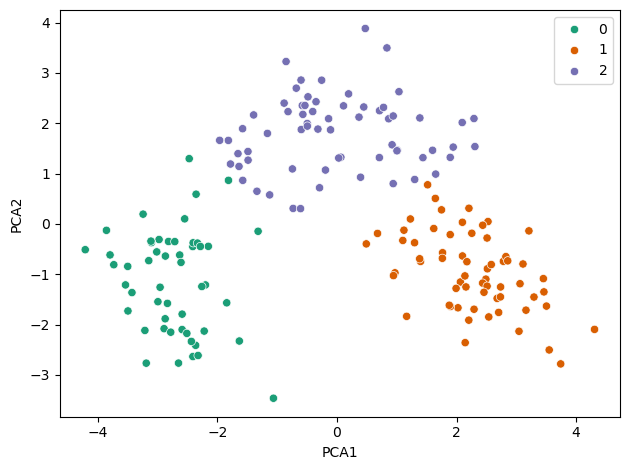

In [110]:
sns.scatterplot(x=pca_df.iloc[:,0],y=pca_df.iloc[:,1],hue=kk.labels_,palette="Dark2")
plt.tight_layout()
plt.show()

In [109]:
from sklearn.metrics import silhouette_score
silhouette_score(pca_df,kkdata)

0.34862593897392463

# for the orginal data

In [66]:
wcss2=[]
for k in range(1,10):
    kkk2=KMeans(n_clusters=k).fit(ssdata)
    wcss2.append(np.round(kkk2.inertia_,2))
wcss2

C:\Users\rosha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rosha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rosha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rosha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

[2314.0, 1658.49, 1271.97, 1180.44, 1124.85, 1078.49, 1020.44, 956.04, 925.51]

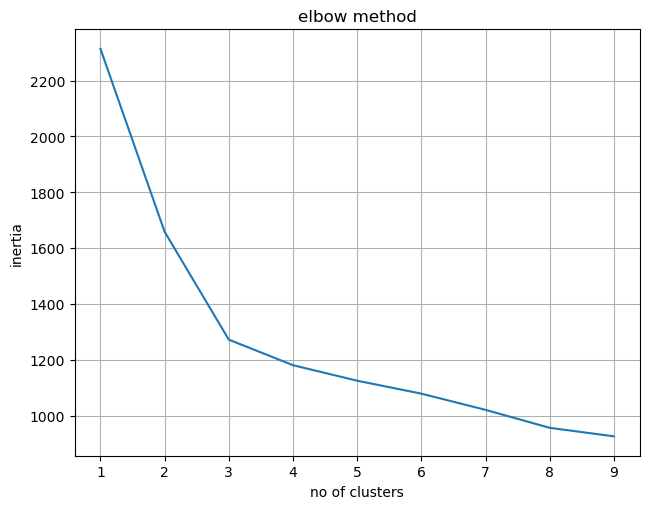

In [95]:
plt.plot(range(1,10),wcss2)
plt.tight_layout()
plt.xlabel("no of clusters")
plt.ylabel("inertia")
plt.title("elbow method")
plt.grid()
plt.show()

In [57]:
kk1=KMeans(n_clusters=3)
kkdata1=kk1.fit_predict(ssdata)

C:\Users\rosha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [58]:
kkdata1

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

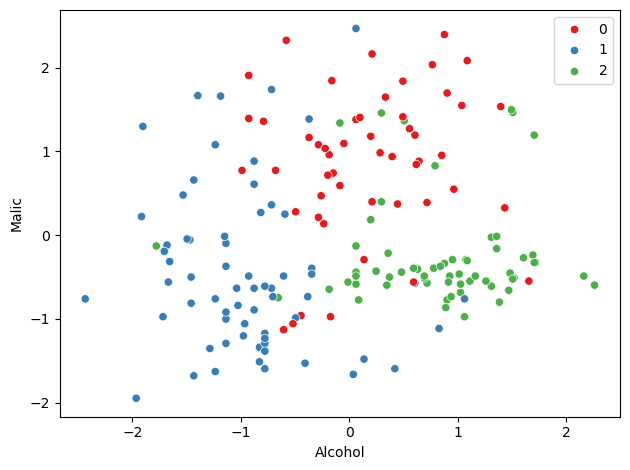

In [101]:

sns.scatterplot(x=ssdata.iloc[:,0],y=ssdata.iloc[:,1],hue=kk1.labels_,palette="Set1")
plt.tight_layout()
plt.show()


In [103]:
silhouette_score(ssdata,kkdata1)

0.2880955786755123

Clustering results from the original standardized dataset produced a silhouette score of 0.2849, indicating weakly defined clusters with overlapping boundaries.
After applying PCA (retaining components that explained ~90% of the variance), the silhouette score increased to 0.3462, showing better separation and compactness.
The 2D PCA visualization revealed distinct clusters, confirming that PCA effectively reduced noise and correlations, thereby improving K-Means clustering performance.
Hence, PCA-transformed data provides more meaningful and interpretable clustering results compared to the original dataset.

1.	Compare the clustering results obtained from the original dataset and PCA-transformed data.

K-Means clustering on the standardized original dataset resulted in a silhouette score of 0.2849, indicating weakly separated clusters.
After applying PCA and retaining the top components that explained approximately 90% of the total variance, the silhouette score improved to 0.3462.
This demonstrates that PCA effectively reduced feature redundancy and noise, allowing K-Means to form more compact and distinct clusters.
The 2D PCA scatter plot further confirmed visually clearer boundaries between clusters.

Hence, clustering on PCA-transformed data provides better-defined and more interpretable groups compared to the original dataset.

2.Discuss any similarities or differences observed in the clustering results.

The clustering structure remained broadly similar before and after PCA, indicating that PCA preserved the essential group patterns in the dataset.
However, after PCA transformation, the clusters became more compact and clearly separated, as reflected by the increase in silhouette score from 0.28 to 0.35.
This suggests that PCA reduced noise and redundancy, improving the overall quality and interpretability of the clustering results.

3.	Reflect on the impact of dimensionality reduction on clustering performance.

Dimensionality reduction through PCA positively impacted clustering performance by removing redundant and noisy information from the dataset.
The resulting principal components provided a cleaner, more compact representation of the data, which improved the K-Means algorithm’s ability to form distinct and meaningful clusters.
The improvement in silhouette score and clearer visual separation confirmed that PCA enhanced both the effectiveness and interpretability of the clustering process.

4.	Analyze the trade-offs between using PCA and clustering directly on the original dataset.

In [ ]:
Clustering directly on the original dataset preserves interpretability and full data information but suffers from high dimensionality and correlated features, which can weaken cluster formation.
In contrast, PCA simplifies the dataset by removing redundancy and noise, leading to better-separated and more compact clusters, as reflected by a higher silhouette score.
However, this improvement comes at the cost of reduced interpretability since principal components represent linear combinations of original variables.

In summary: PCA enhances clustering performance and clarity, but the original dataset provides stronger interpretability — the optimal choice depends on whether the goal is accuracy or explainability.

Task 6: Conclusion and Insights

In [ ]:
1	Summarize the key findings and insights from the assignment.

In conclusion, the study showed that applying PCA before clustering improved both the quality and clarity of clusters by simplifying the feature space and removing redundancy.
While clustering on the original dataset preserved interpretability, the PCA-transformed data achieved higher compactness and separation, as reflected by the improved silhouette score.
Thus, dimensionality reduction serves as an effective preprocessing step for clustering high-dimensional datasets like the wine data, especially when the goal is to enhance performance and visualization.

2.	Discuss the practical implications of using PCA and clustering in data analysis.

In practical data analysis, combining PCA with clustering provides a powerful approach to uncover structure in complex, high-dimensional datasets.
PCA reduces data noise and dimensionality, making clustering algorithms more effective and interpretable.
This approach is widely used in business analytics, biology, and image processing to reveal meaningful patterns, segment data efficiently, and support data-driven decision-making — all while maintaining computational efficiency.